In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

df = pd.read_csv('kc_house_data.csv')
df.drop('id', axis=1, inplace=True)

In [2]:
df.waterfront.fillna(0.0, inplace=True)
df.yr_renovated.fillna(0.0, inplace=True)
df.view.fillna(0.0, inplace=True)

In [3]:
df.drop(df[df.bedrooms > 7].index, inplace=True)
df.drop(df[df.grade > 11].index, inplace=True)
df.drop(df[df.grade ==4].index, inplace=True)
df.drop(df[df.price==7060000.0].index, inplace=True)
df.drop(df[df.sqft_living > 6000].index, inplace=True)
df.drop(df[df.price==3850000.0].index, inplace=True)
df.drop(df[df.sqft_lot > 40000].index, inplace=True)
df.drop(df[df.bathrooms > 3.25].index, inplace=True)
df.drop(df[df.bathrooms < 1.00].index, inplace=True)

In [4]:
df_pred1 = df.loc[:, ['yr_built', 'bedrooms', 'sqft_living', 'grade', 'sqft_living15', 'sqft_lot', 'bathrooms']]

In [5]:
df_pred2 = df_pred1.copy()

## Predictor values pre-log
* df_pred1 are **some** of the predictor values from the main dtaframe that are in their raw state.

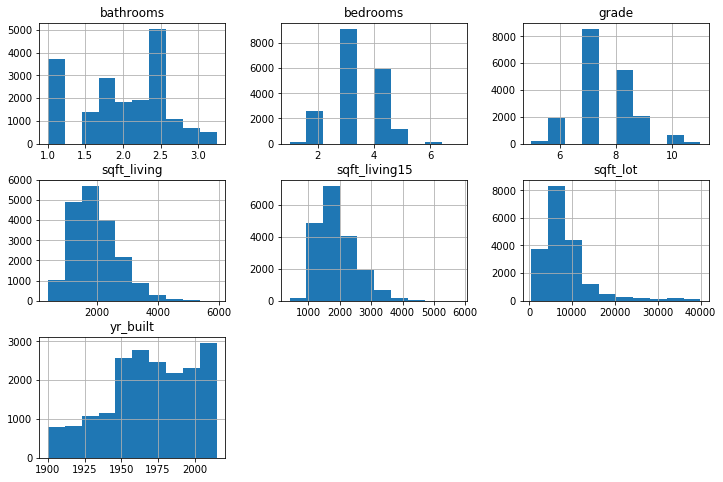

In [6]:
# plt.figure(figsize=(15,8))
df_pred1.hist(figsize=(12,8))
plt.show()

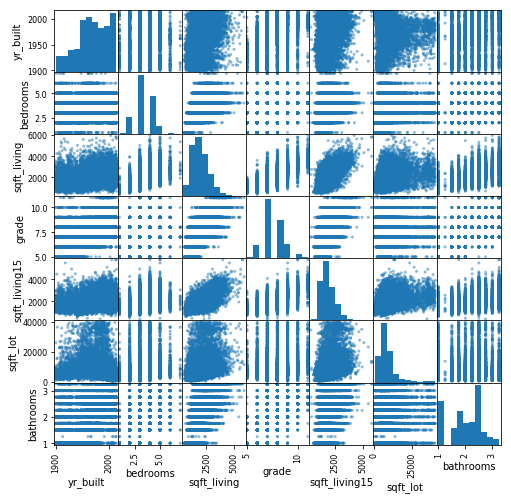

In [8]:
pd.plotting.scatter_matrix(df_pred1, figsize=(8,8))
plt.show()

## Predictor values post-log
* df_pred2 refers to the dataframe of values after the continuous variables have been log-transformed. 

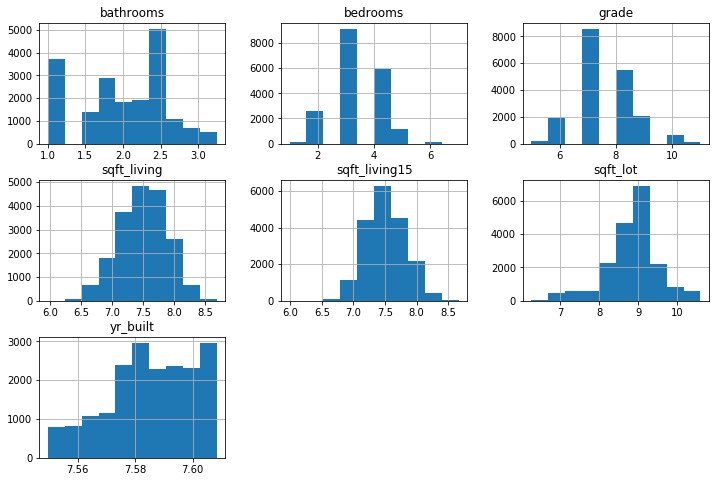

In [9]:
things = ['sqft_living', 'sqft_living15', 'sqft_lot', 'yr_built']
for thing in things:
    df_pred2[thing] = df_pred2[thing].map(lambda x: np.log(x))
df_pred2.hist(figsize=(12,8))
plt.show()

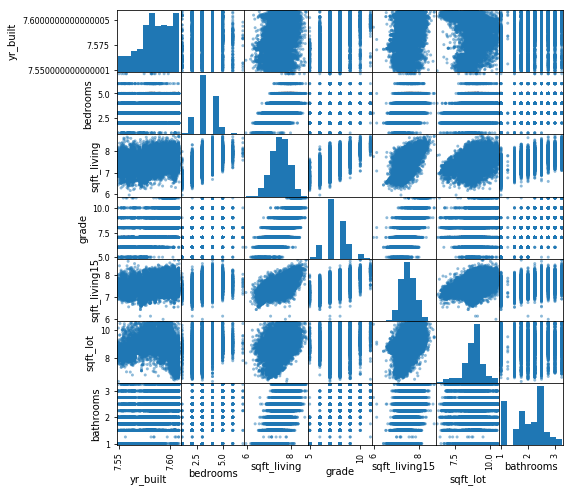

In [11]:
pd.plotting.scatter_matrix(df_pred2, figsize=(8,8));

In [24]:
df_pred1.corr()

,yr_built,bedrooms,sqft_living,grade,sqft_living15,sqft_lot,bathrooms
yr_built,1.000000,0.137245,0.287245,0.433719,0.301766,0.008526,0.529918
bedrooms,0.137245,1.000000,0.593403,0.319041,0.394856,0.173605,0.471323
sqft_living,0.287245,0.593403,1.000000,0.704954,0.752775,0.290191,0.683564
grade,0.433719,0.319041,0.704954,1.000000,0.682813,0.179625,0.601397
sqft_living15,0.301766,0.394856,0.752775,0.682813,1.000000,0.333943,0.529411
sqft_lot,0.008526,0.173605,0.290191,0.179625,0.333943,1.000000,0.066071
bathrooms,0.529918,0.471323,0.683564,0.601397,0.529411,0.066071,1.000000


In [33]:
def create_plot(variable):
    return plt.scatter(x=df_pred1[variable], y=df['price'], alpha=.2);

In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [49]:
np.corrcoef(df['sqft_living'], df['price'])

array([[1.        , 0.61928086],
       [0.61928086, 1.        ]])

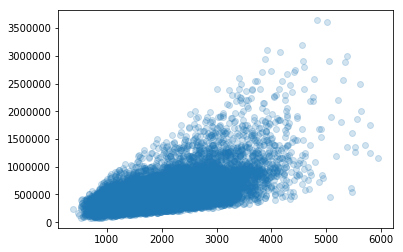

In [59]:
create_plot('sqft_living')

In [27]:
df2 = df.copy()

In [32]:
print(len(df2.loc[df2.loc[:, 'price'] > 1250000.0]))

0


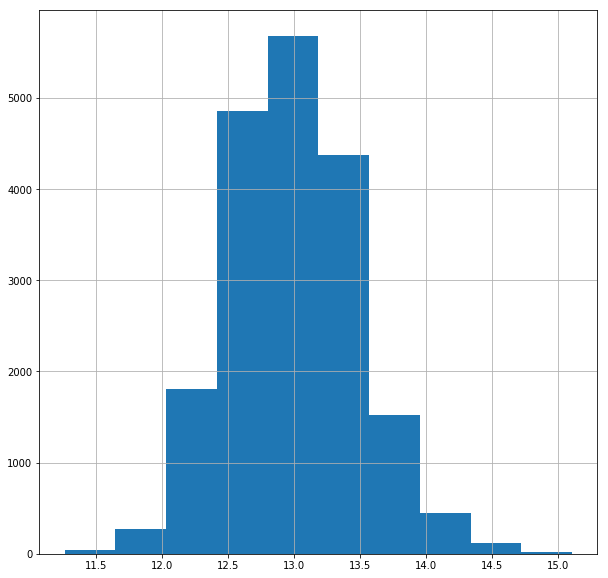

In [31]:
df2.price.hist(figsize=(10,10))

In [30]:
# df2.drop(df[df.price > 1250000.0].index, inplace=True)
df2['price'] = np.log(df2['price'])


In [20]:
df2.price.head()

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: price, dtype: float64